<a href="https://colab.research.google.com/github/nekotanku/colab/blob/master/Udemy_pytorch_%E3%82%AA%E3%83%BC%E3%83%88%E3%82%A8%E3%83%B3%E3%82%B3%E3%83%BC%E3%83%80%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch 
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import  datasets, transforms
from torch.utils.data import DataLoader
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
transform = transforms.Compose([
                                transforms.ToTensor()
])

In [7]:
train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [9]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [14]:
#モデル構築
class ConvAE(nn.Module):
    def __init__(self):
        super().__init__()
        #Encoder
        self.en = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding=1), 
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1), 
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1), 
            nn.ReLU(inplace=True),
           )
        #Decorder
        self.de = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1), 
            nn.ReLU(inplace=True),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3, padding=1), 
            nn.ReLU(inplace=True),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(in_channels=8, out_channels=1, kernel_size=3, padding=1), 
            nn.Tanh()
        )

    def forward(self, x):
        x = self.en(x)
        x = self.de(x)
        return x
    


In [15]:
#モデルの作成とGPUに送信
model = ConvAE()
model.to(device)

ConvAE(
  (en): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
  )
  (de): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Upsample(scale_factor=2.0, mode=nearest)
    (3): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): Upsample(scale_factor=2.0, mode=nearest)
    (6): Conv2d(8, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): Tanh()
  )
)

In [18]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [20]:
num_epochs = 15
losses = []
for epoch in range(num_epochs):
    running_loss = 0.0
    for imgs, _ in train_loader:
        imgs = imgs.to(device)
        potimizer.zero_grad()
        output = model(imgs)
        loss = criterion(output, imgs)
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
    running_loss /= len(train_loader)
    losses.append(running_loss)
    print("epoch:{}, loss:{} ".format(epoch, running_loss))


epoch:0, loss:0.005877959311505159 
epoch:1, loss:0.005076121721913417 
epoch:2, loss:0.004625573724508286 
epoch:3, loss:0.004318656760330002 
epoch:4, loss:0.0041161756287018455 
epoch:5, loss:0.003964694191142917 
epoch:6, loss:0.003845294632638494 
epoch:7, loss:0.0037441398318856954 
epoch:8, loss:0.003652525631090005 
epoch:9, loss:0.0035834350189814963 
epoch:10, loss:0.003515064367155234 
epoch:11, loss:0.0034616739857941865 
epoch:12, loss:0.0034064484001447757 
epoch:13, loss:0.0033570671980579694 
epoch:14, loss:0.003312459022551775 


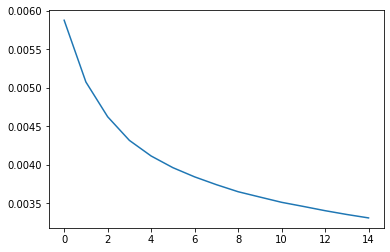

In [21]:
plt.plot(losses)

In [23]:
data_iter = iter(train_loader)
imgs, _ = data_iter.next()
img = imgs[0]
img_permute = img.permute(1, 2, 0)

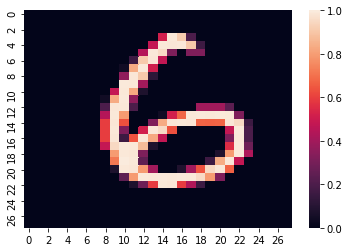

In [24]:
sns.heatmap(img_permute[:, :, 0])

In [26]:
#encode
x_en = model.en(imgs.to(device))
x_en2 = x_en[0].permute(1,2,0)

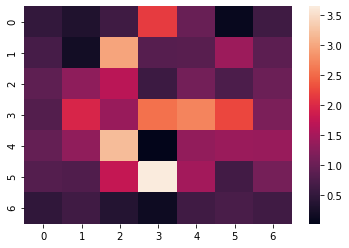

In [27]:
sns.heatmap(x_en2[:,:,0].detach().to("cpu"))

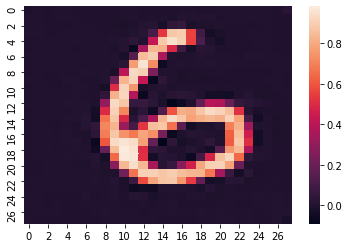

In [29]:
#encoder -> decoer
x_ae = model(imgs.to(device))
sns.heatmap(x_ae[0].permute(1,2,0).detach().to("cpu")[:, :, 0])
